# Week 13 - 
Introduction to Numerical Problem Solving, Spring 2017   
Luong Nguyen, 26.4.2017  
Helsinki Metropolia University of Applied Sciences

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


analytically 16.5663706144


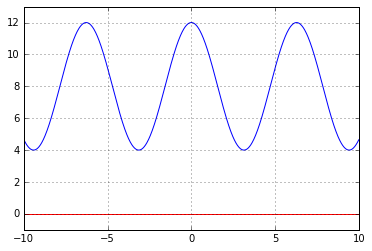

In [22]:
f1 = lambda x : 8 + 4 * cos(x)
a = 0
b = pi/2

fi = lambda x : 8 * x + 4 * sin(x)
iTrue = fi(pi/2) - fi(0);
print("analytically", iTrue)
x = np.linspace(-10, 10, 1000)

axhline(0, color = 'r')
ylim(-1, 13)
plot(x, f1(x))
grid()
show()

In [85]:
import scipy as sp
from scipy import integrate

# using scipy.integrate
val, err = sp.integrate.quad(f1, 0, pi/2)
print(val)

16.56637061435917


In [13]:
# using trapezoidal rule
a = 0
b = pi/2

print((b-a) * (f1(a) + f1(b)) / 2)

15.7079632679


In [27]:
f1 = lambda x : 8 + 4 * cos(x)

# multiple application trapezoidal rule
def multipleTrapezoidals(f, a, b, n):
    h = (b - a) / n
    result = f(a) + f(b)
    i = 1
    while(i < n):
        i += 1
        a += h
        result += f(a)
    return result * h / 2

print(multipleTrapezoidals(f1, 0, pi/2, 2))
print(multipleTrapezoidals(f1, 0, pi/2, 4))
print(multipleTrapezoidals(f1, 0, pi/2, 1))

12.1062950221
10.2209123176
15.7079632679


In [18]:
# single Simpson 1/3
def singleSimpson13(f, a, b):
    mid = (a + b) / 2
    return (b - a) * (f(a) + f(b) + 4 * f(mid)) / 6

print(singleSimpson13(f1, a, b))

16.5754901243


In [60]:
# single Simpson 1/3
def multipleSimpson13(f, a, b, n):
    h = (b - a) / n
    result = f(a) + f(b)
    i = 0
    while(i < n-1):
        i += 1
        a += h
        if (i % 2 == 1):
            result += 4 * f(a)
        else:
            result += 2 * f(a)
    return result * h / 3


print(multipleSimpson13(f1, a, b, 5))

7.82461826518


In [70]:
def multipleSimpson38(f, a, b, n):
    h = (b - a) / n
    result = f(a) + f(b)
    i = 0
    while(i < n - 1):
        i += 1
        a += h
        result += 3 * f(a)
    return result * h * 3 / 8


print(multipleSimpson38(f1, a, b, 5))

51.9646447147


___
## Exercise 2

In [44]:
f2 = lambda x :  1 - exp(-x)
a = 1
b = 2

In [52]:
# analytically
import sympy as sp
x = sp.symbols('x')
sp.integrate(1 - sp.exp(-x), (x, 1, 2))
iTrue = -exp(-1) + exp(-2) + 1 
print('Result: {:.4f}'.format(iTrue))

Result: 0.7675


In [53]:
# b
result = multipleTrapezoidals(f2, a, b, 1)
error = abs(result - iTrue) / iTrue * 100
print('Result: {:.4f}'.format(result))
print('Error: {:.4f}%'.format(error))

Result: 0.7484
Error: 2.4839%


In [56]:
# c
for n in (2, 4):
    print('n = {}'.format(n))
    result = multipleTrapezoidals(f2, a, b, n)
    error = abs(result - iTrue) / iTrue * 100
    print('\tResult: {:.4f}'.format(result))
    print('\tError: {:.4f}%'.format(error))

n = 2
	Result: 0.5684
	Error: 25.9353%
n = 4
	Result: 0.4767
	Error: 37.8893%


In [61]:
# d
result = multipleSimpson13(f2, a, b, 2)
# result = singleSimpson13(f2, a, b)

error = abs(result - iTrue) / iTrue * 100
print('Result: {:.4f}'.format(result))
print('Error: {:.4f}%'.format(error))


Result: 0.7674
Error: 0.0102%


In [62]:
# e
result = multipleSimpson13(f2, a, b, 4)
error = abs(result - iTrue) / iTrue * 100

print('Result: {:.4f}'.format(result))
print('Error: {:.4f}%'.format(error))

Result: 0.7675
Error: 0.0007%


In [63]:
# f
result = multipleSimpson13(f2, a, b, 5)
error = abs(result - iTrue) / iTrue * 100

print('Result: {:.4f}'.format(result))
print('Error: {:.4f}%'.format(error))

Result: 0.7107
Error: 7.3942%


___
## Exercise 3

In [92]:
f3 = lambda x :  1 - x - 4 * x**3 + 2 * x**5
a = -2
b = 4

In [74]:
# a - analytically

iTrue = sp.integrate(1 - x - 4 * x**3 + 2 * x**5, (x, -2, 4)).evalf()

print('Result: {:.4f}'.format(iTrue))

Result: 1104.0000


In [72]:
# b
result = multipleTrapezoidals(f3, a, b, 1)
error = abs(result - iTrue) / iTrue * 100
print('Result: {:.4f}'.format(result))
print('Error: {:.4f}%'.format(error))

Result: 5280.0000
Error: 378.2609%


In [75]:
# c
for n in (2, 4):
    print('n = {}'.format(n))
    result = multipleTrapezoidals(f3, a, b, n)
    error = abs(result - iTrue) / iTrue * 100
    print('\tResult: {:.4f}'.format(result))
    print('\tError: {:.4f}%'.format(error))

n = 2
	Result: 2637.0000
	Error: 138.8587%
n = 4
	Result: 1418.4375
	Error: 28.4817%


In [80]:
# d single simpson 1/3
result = multipleSimpson13(f3, a, b, 2)
error = abs(result - iTrue) / iTrue * 100

print('Result: {:.4f}'.format(result))
print('Error: {:.4f}%'.format(error))

Result: 1752.0000
Error: 58.6957%


In [95]:
# e simpson 3/8 - n = 3
result = multipleSimpson38(f3, a, b, 3)
error = abs(result - iTrue) / iTrue * 100

print('Result: {:.4f}'.format(result))
print('Error: {:.4f}%'.format(error))

Result: 1392.0000
Error: 26.0870%


In [97]:
# f
val, err = sp.integrate.quad(f3, a, b)

print('Result: {:.4f}'.format(val))
print('Error: {:.4f}%'.format(err))

Result: 1104.0000
Error: 0.0000%


___
## Exercise 4

In [103]:
f4 = lambda x : (x + 1 / x)**2
a = 1 
b = 2

In [105]:
import sympy as sp
x = sp.symbols('x')

iTrue = sp.integrate((x + 1 / x)**2, (x, a, b)).evalf()

print('Result: {:.4f}'.format(iTrue))

for n in range(1, 21):
    print('n = {}'.format(n))
    result = multipleTrapezoidals(f3, a, b, n)
    error = abs(result - iTrue) / iTrue * 100
    print('\tResult: {:.4f}'.format(result))
    print('\tError: {:.4f}%'.format(error))

Result: 4.8333
n = 1
	Result: 14.5000
	Error: 200.0000%
n = 2
	Result: 7.5469
	Error: 56.1422%
n = 3
	Result: 5.6914
	Error: 17.7522%
n = 4
	Result: 4.8584
	Error: 0.5186%
n = 5
	Result: 4.3896
	Error: 9.1807%
n = 6
	Result: 4.0901
	Error: 15.3776%
n = 7
	Result: 3.8825
	Error: 19.6714%
n = 8
	Result: 3.7304
	Error: 22.8192%
n = 9
	Result: 3.6142
	Error: 25.2243%
n = 10
	Result: 3.5225
	Error: 27.1212%
n = 11
	Result: 3.4483
	Error: 28.6552%
n = 12
	Result: 3.3871
	Error: 29.9212%
n = 13
	Result: 3.3358
	Error: 30.9837%
n = 14
	Result: 3.2921
	Error: 31.8879%
n = 15
	Result: 3.2544
	Error: 32.6668%
n = 16
	Result: 3.2217
	Error: 33.3446%
n = 17
	Result: 3.1929
	Error: 33.9399%
n = 18
	Result: 3.1674
	Error: 34.4668%
n = 19
	Result: 3.1447
	Error: 34.9365%
n = 20
	Result: 3.1244
	Error: 35.3578%


___
## Exercise 5

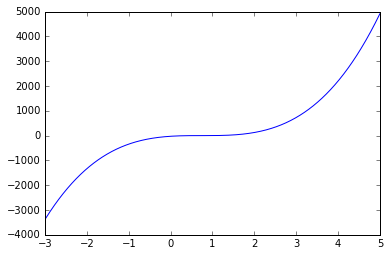

In [135]:
f5 = lambda x : (4 * x - 3)**3
a = -3
b = 5

x = linspace(a, b, 1000)

plot(x, f5(x))

In [131]:
from scipy.integrate import simps
tol = 0.01 
a = -3
b = 5
n = 5

f5 = lambda x : (4 * x - 3)**3

import sympy as sp
x = sp.symbols('x')

iTrue = sp.integrate((4 * x - 3)**3, (x, a, b)).evalf()
print('Result: {:.4f}'.format(iTrue))


Result: 2056.0000


In [149]:
def ex5(f, nstart, a, b, tol):
    n = nstart
    while True:
        x = linspace(a, b, n)
        y = f(x)
        result = simps(y, x)
        error = abs(result - iTrue) / iTrue 
        if error <= tol:
            break
        n += 1
    return n

print(ex5(f5, 4, a, b, tol = 0.01 / 100))

5
